In [27]:
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df_cust=pd.read_csv("customers.csv")
df_cust.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [5]:
df_cs=pd.read_csv("credit_profiles.csv")
df_trans=pd.read_csv("transactions.csv")

In [6]:
df_cs.head()


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [7]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [8]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [9]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [10]:
df_cust[df_cust.annual_income.isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married


## to treat outliners in age column of customer table

In [11]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [13]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

(array([  7.,   0.,  87., 225., 246., 143.,  79.,  95.,  80.,  25.,   0.,
          0.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,   4.]),
 array([  1. ,   7.7,  14.4,  21.1,  27.8,  34.5,  41.2,  47.9,  54.6,
         61.3,  68. ,  74.7,  81.4,  88.1,  94.8, 101.5, 108.2, 114.9,
        121.6, 128.3, 135. ]),
 <BarContainer object of 20 artists>)

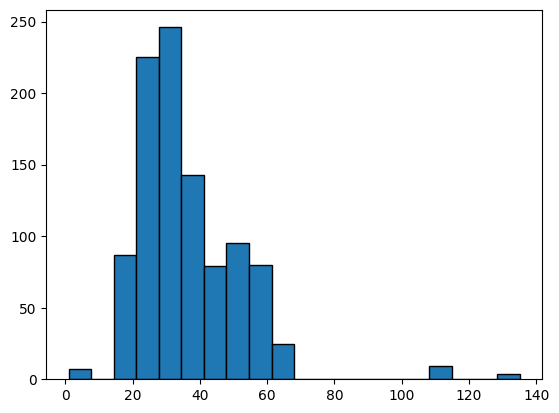

In [31]:
plt.hist(df_cust.age,bins=20,edgecolor="black")

In [32]:
df_cust[df_cust.annual_income.isna()].head(4)
                                           

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married


In [33]:
df_cust.annual_income.median()

112218.5

In [37]:
Occupation_wise_median= df_cust.groupby("occupation")["annual_income"].median()
Occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [36]:
Occupation_wise_median["Artist"]

45794.0

In [43]:
df_cust["annual_income"] = df_cust.apply(
    lambda row: Occupation_wise_median[row['occupation']] if pd.isnull(row["annual_income"]) else row["annual_income"], axis=1)

In [44]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [45]:
df_cust[df_cust.annual_income.isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [46]:
df_cust.iloc[14]

cust_id                      15
name              Sanjana Malik
gender                   Female
age                          25
location                  Rural
occupation               Artist
annual_income           45794.0
marital_status          Married
Name: 14, dtype: object

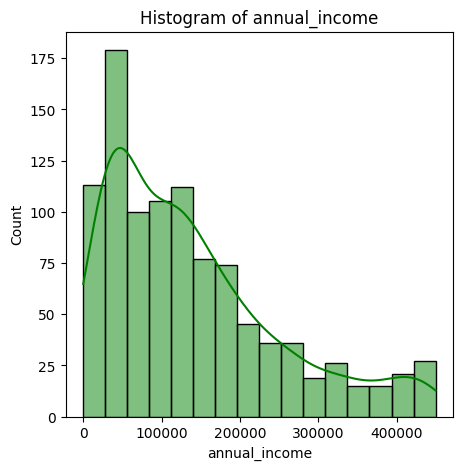

In [47]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [48]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [48]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [48]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [50]:
min_age = df_cust.age.min()
max_age = df_cust.age.max()

min_age, max_age

(1, 135)

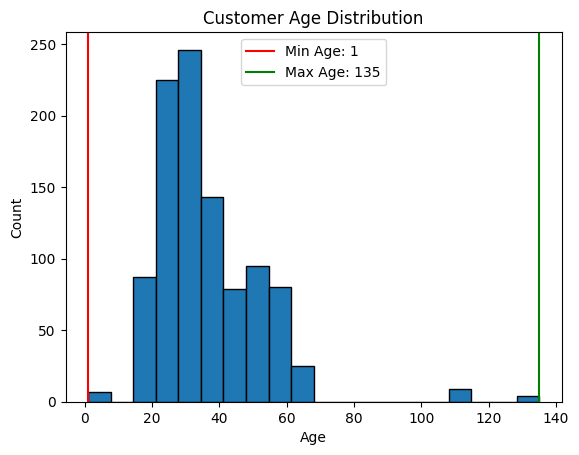

In [51]:
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

plt.legend()
plt.show()

In [56]:
outliers = df_cust[(df_cust.age<15)|(df_cust.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [54]:
median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [60]:
for index, row in outliers.iterrows():
    df_cust.at[index, 'age'] = median_age_per_occupation[row['occupation']]

C:\Users\harsh\AppData\Local\Temp\ipykernel_6092\3162521118.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index, 'age'] = median_age_per_occupation[row['occupation']]


In [61]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
